In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('E:\spotify project/spotify-2023.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

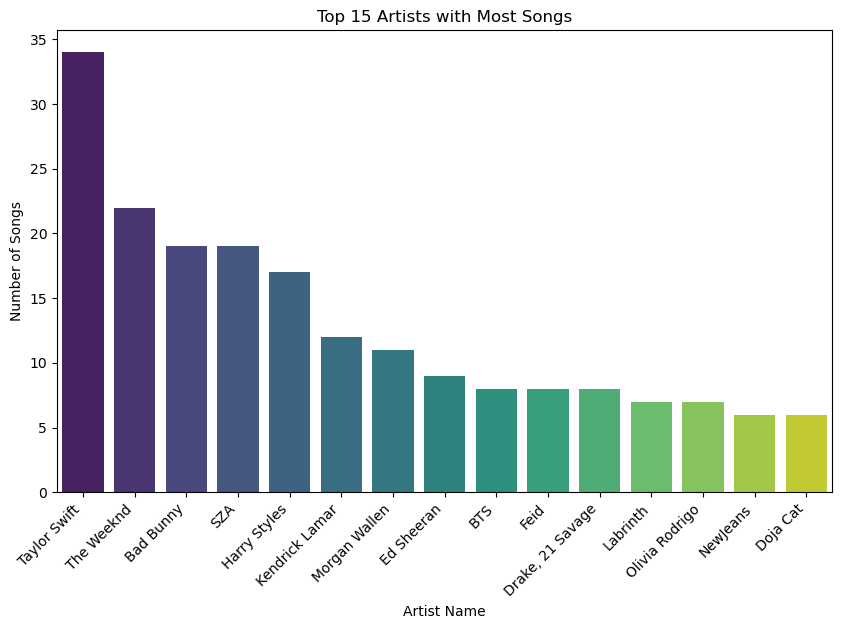

In [10]:
artist_counts = df['artist(s)_name'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.head(15).index, y=artist_counts.head(15), palette='viridis')
plt.title('Top 15 Artists with Most Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [11]:
artist_counts.head(50)

Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
Kendrick Lamar        12
Morgan Wallen         11
Ed Sheeran             9
BTS                    8
Feid                   8
Drake, 21 Savage       8
Labrinth               7
Olivia Rodrigo         7
NewJeans               6
Doja Cat               6
Billie Eilish          5
Drake                  4
IVE                    4
Arctic Monkeys         4
Karol G                4
Adele                  4
Bruno Mars             4
Quevedo                4
Mï¿½ï¿½ne              4
Eminem                 4
Imagine Dragons        3
Post Malone            3
BLACKPINK              3
Joji                   3
Justin Bieber          3
Jack Harlow            3
Beyoncï¿               3
The Neighbourhood      3
Coldplay               3
ENHYPEN                3
Lewis Capaldi          3
Lana Del Rey           3
Tyler, The Creator     3
Steve Lacy             3
Jimin                  3


In [12]:
df["artist(s)_name"].nunique()

645

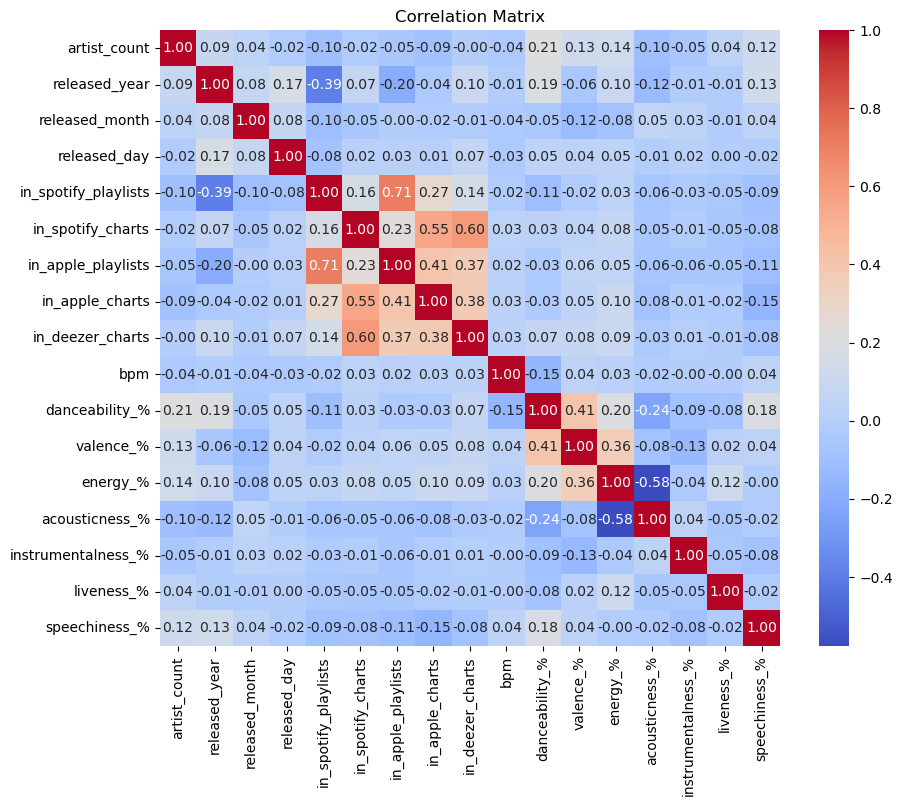

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

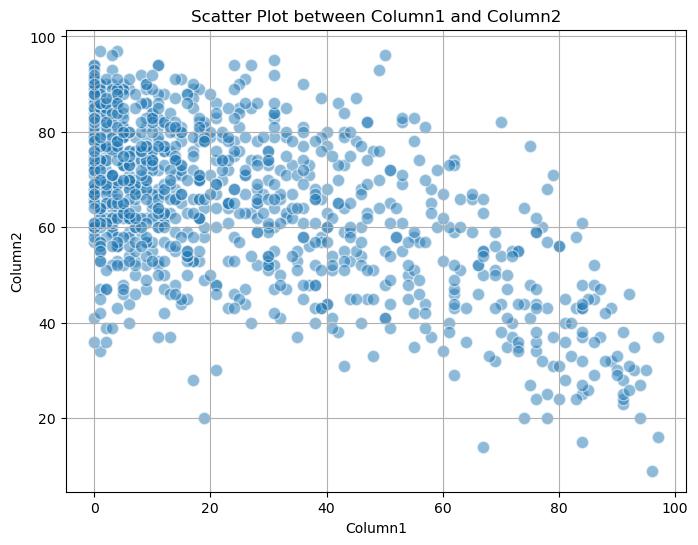

In [14]:
plt.figure(figsize=(8, 6))

plt.scatter(df['acousticness_%'], df['energy_%'], alpha=0.5, edgecolors='w', s=80)
plt.title('Scatter Plot between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.grid(True)
plt.show()

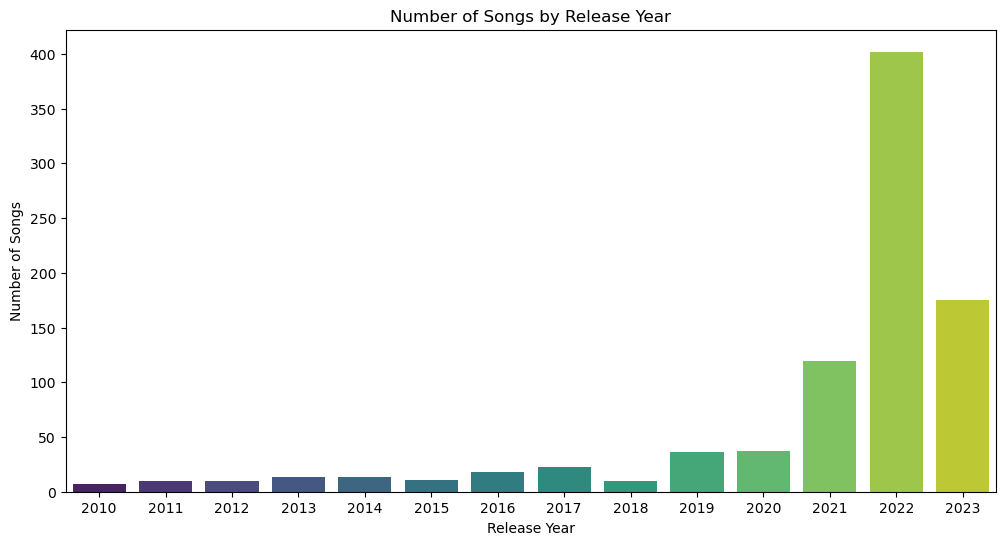

In [15]:
songs_by_year = df['released_year'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=songs_by_year.head(14), palette='viridis')
plt.title('Number of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()

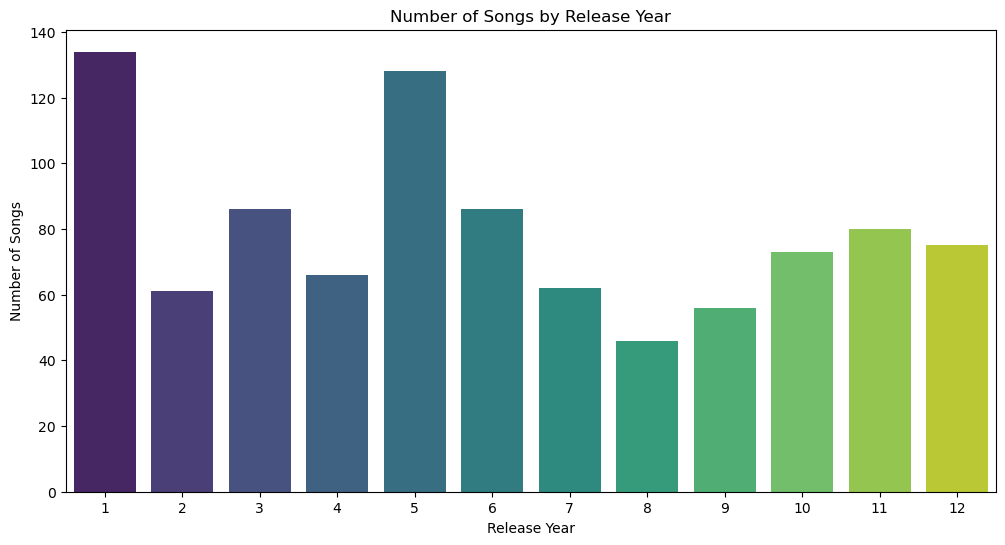

In [16]:
songs_by_year = df['released_month'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=songs_by_year.head(14), palette='viridis')
plt.title('Number of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()

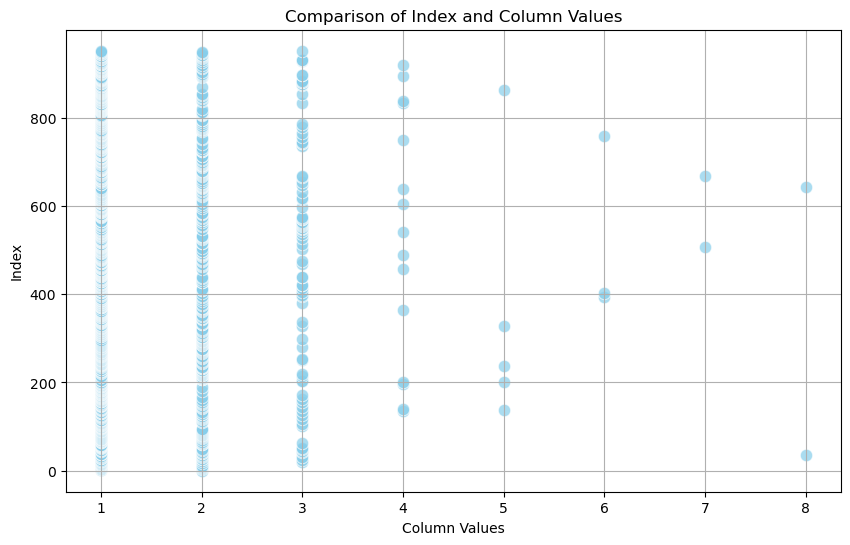

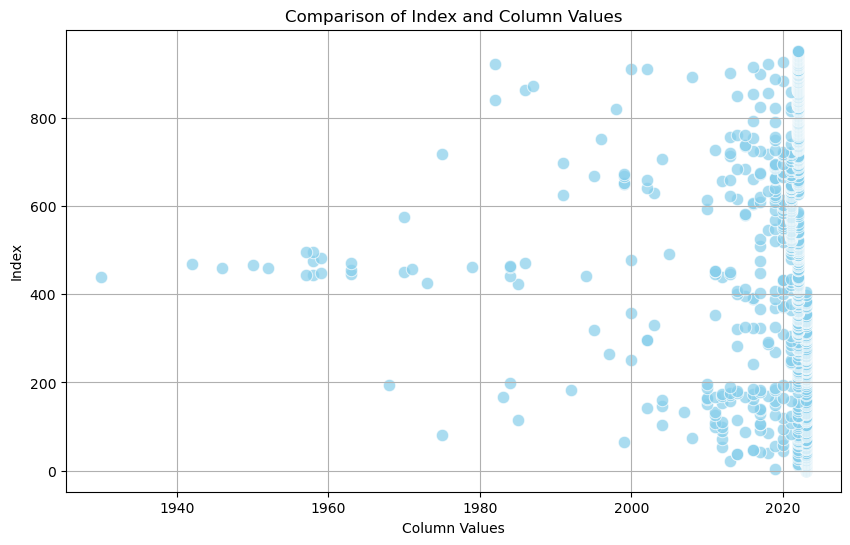

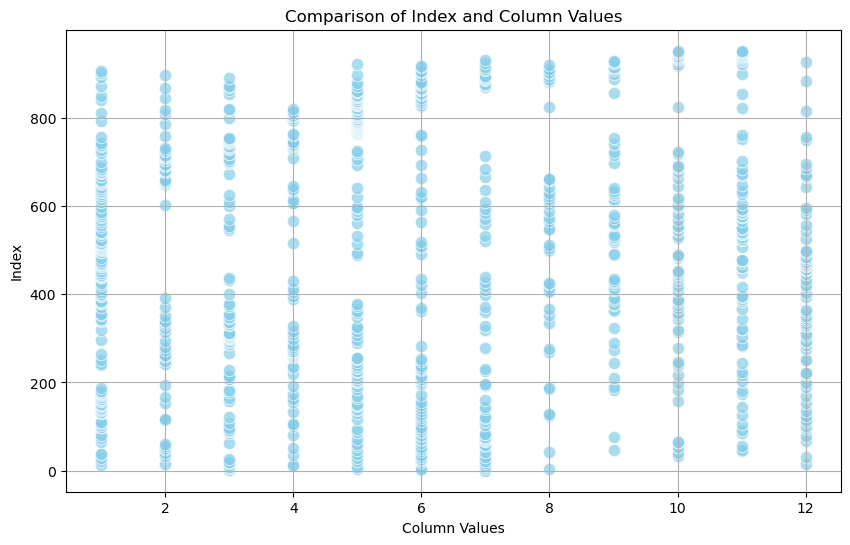

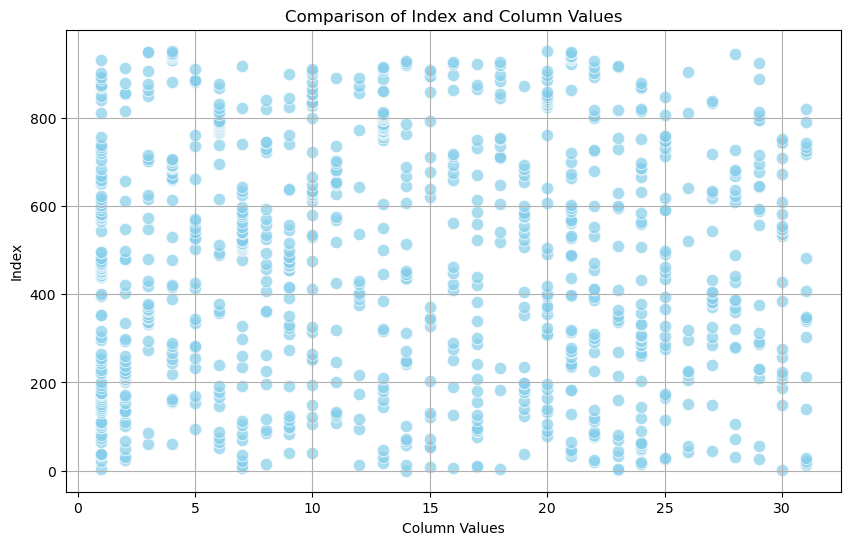

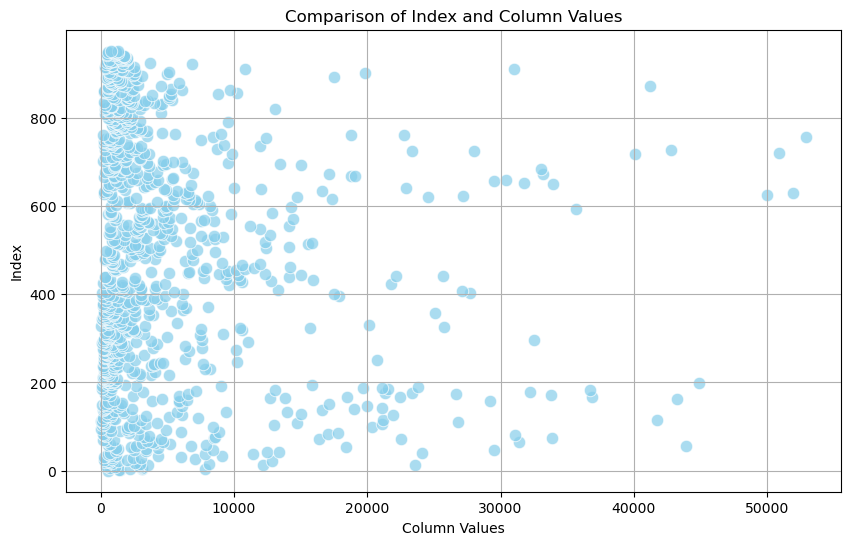

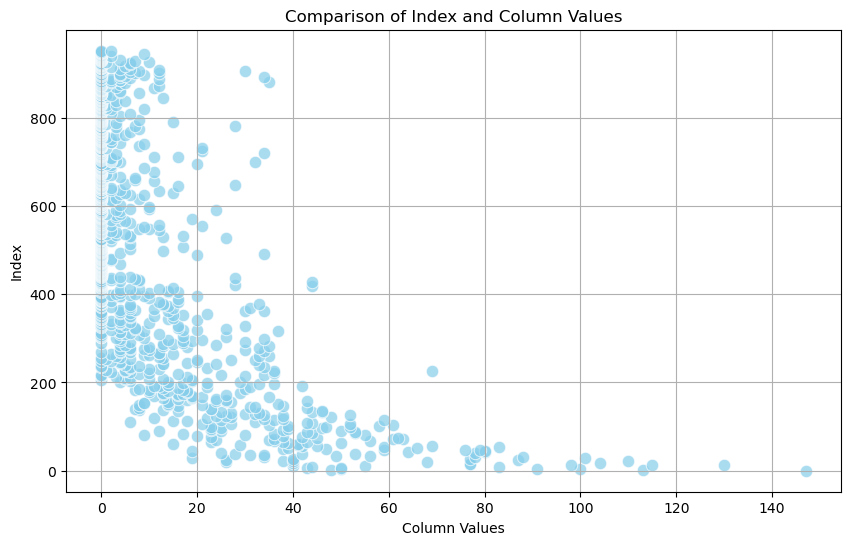

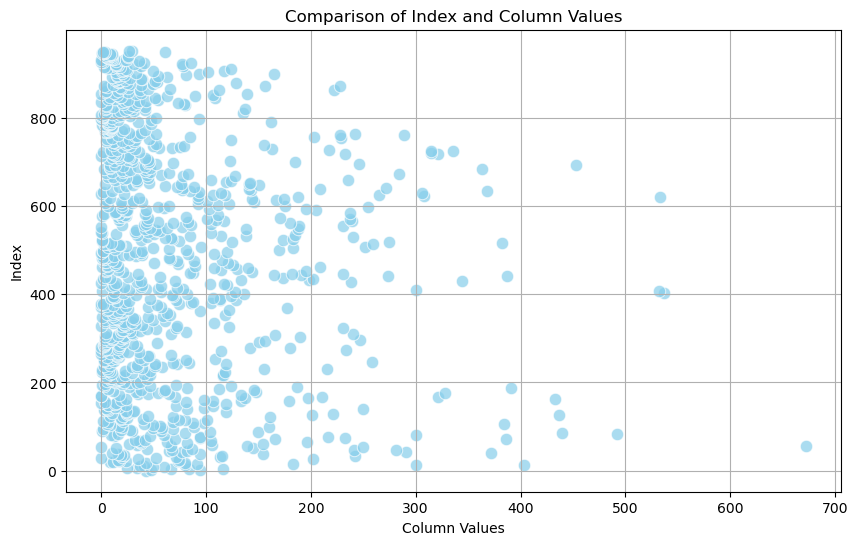

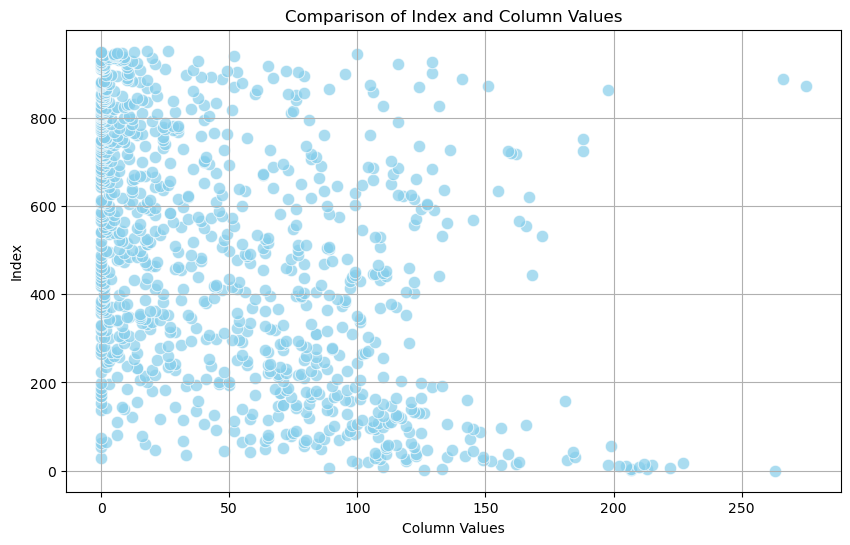

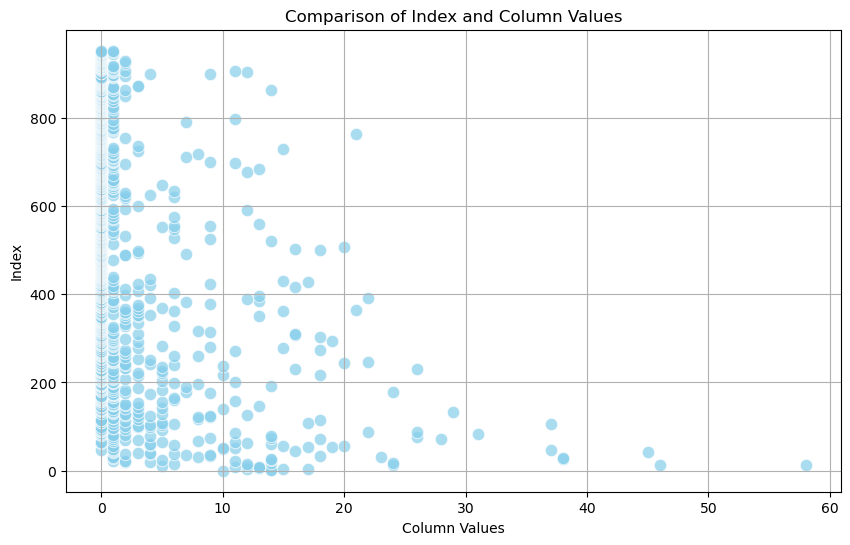

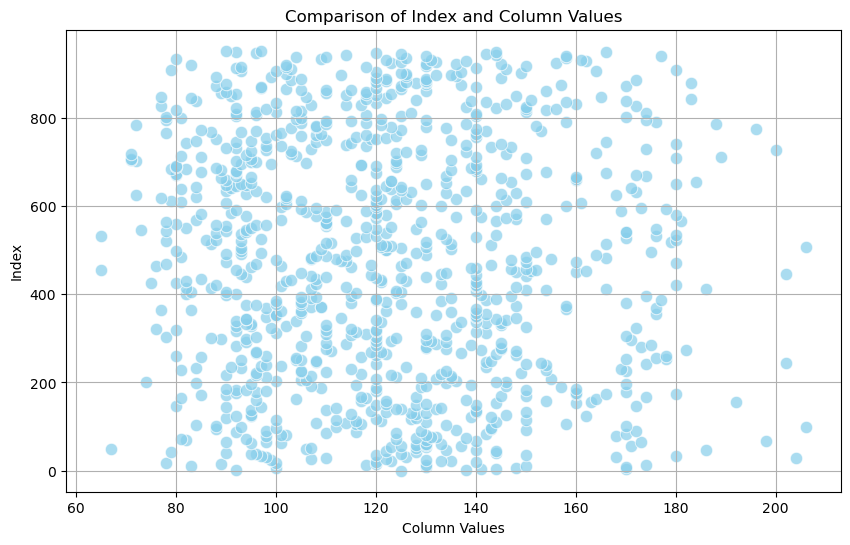

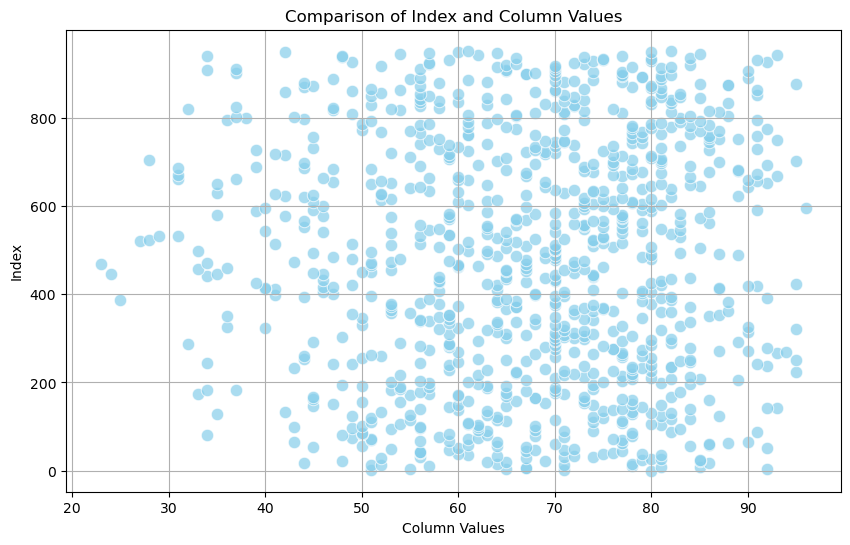

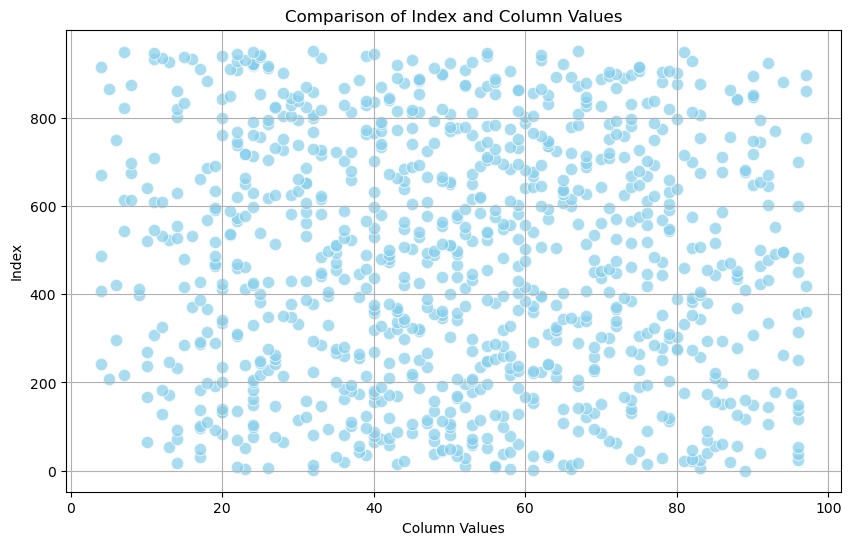

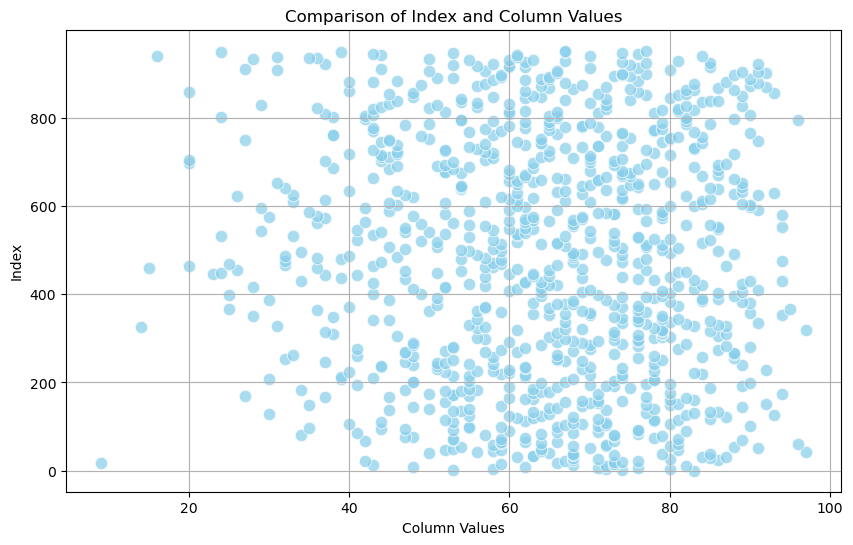

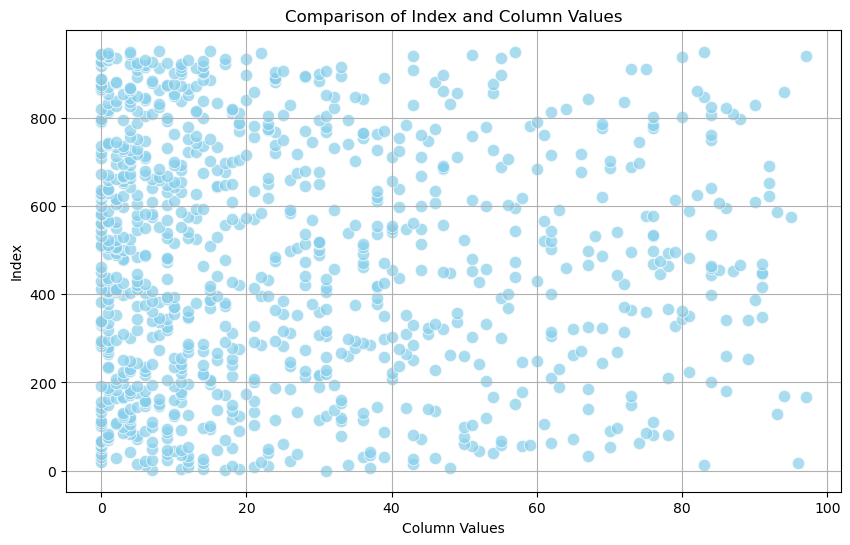

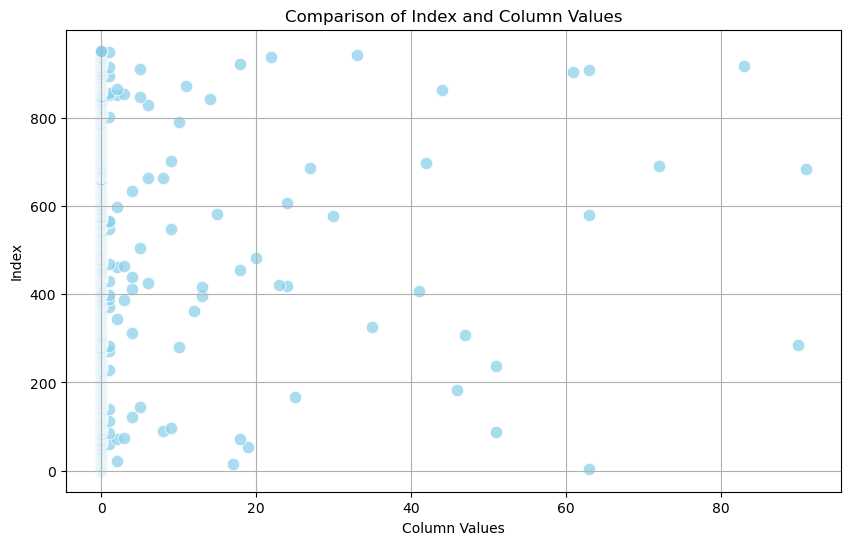

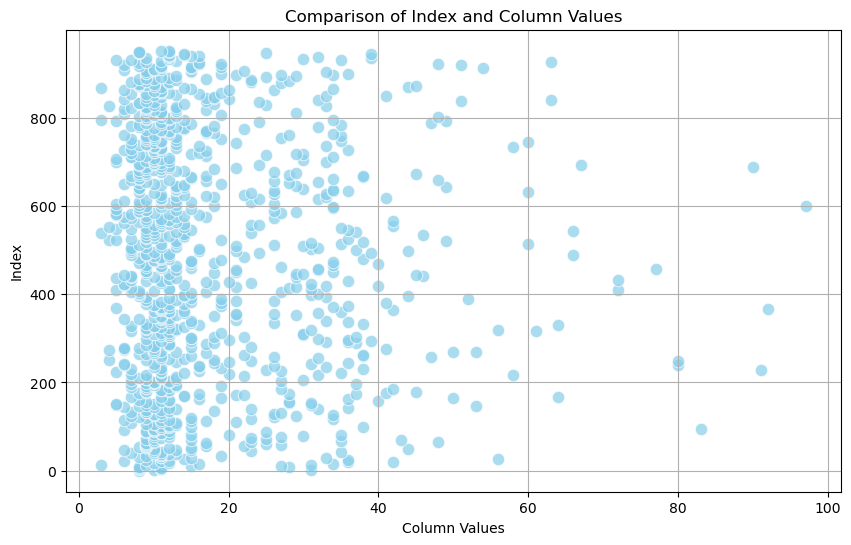

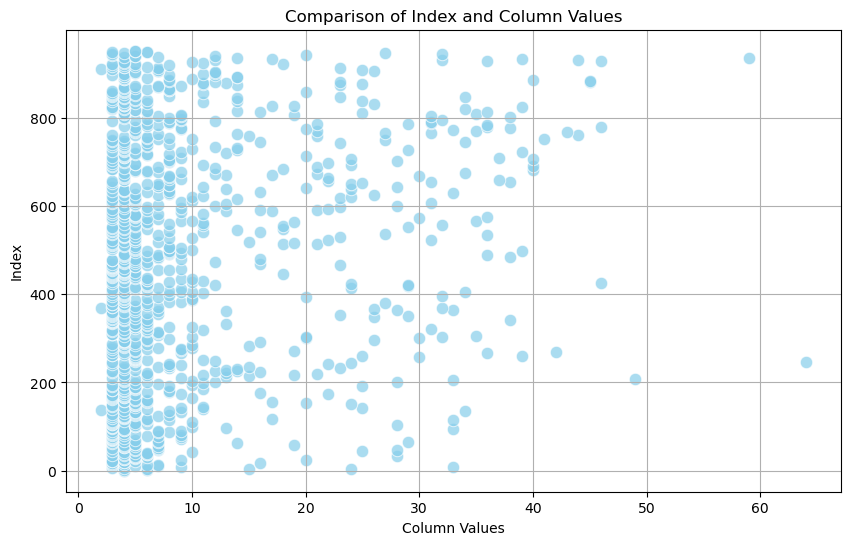

In [17]:
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col], y=df.index, color='skyblue', edgecolor='w', s=80, alpha=0.7)
    plt.title('Comparison of Index and Column Values')
    plt.ylabel('Index')
    plt.xlabel('Column Values')
    plt.grid(True)
    plt.show()

In [18]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [20]:
df.describe(include="object")

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,817,817,817,817,817,817,817
unique,811,571,814,292,187,11,2
top,Miss You,Taylor Swift,1223481149,0,0,C#,Major
freq,2,29,2,21,309,115,452


In [21]:
df[df['track_name'] == "Miss You"]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
335,Miss You,"Robin Schulz, Oliver Tree",2,2022,8,5,5730,10,497225336,108,...,145,F#,Minor,59,20,74,1,0,15,5
922,Miss You,Southstar,1,1982,5,16,2020,0,154356956,77,...,145,A,Major,66,24,58,17,0,19,5
